# Algorithmes: Recuit simulé

Il y a Différents programmes:

Note: Les distances sont en kilomètres, on a simulé des points a grandes distances, il peut donc y avoir deux points avec 700Km d'écart, nos temps de routes seront donc importants.

1) Celui de génération de graph est le premier a lancer, en bas du code ou on appelle la fonction, on peut voir les variables d'initialisations comme le nombre de points, leurs degrés, et le nombre de points de livraisons

2) La génération de solutions aléatoires, ca va générer une solutions passant par tous les points de livraisons et retournant aux dépot. Ce chemin respectera les routes présentes sur le graph respecté précédemment, car c'est une contrainte supplémentaire que nous nous sommes fixés pour apporter du réalisme à nos instances.

3) Solution brut:
Algorithme recuit simulé sans contrainte de variation du trafic ou de temps. On minimise uniquement la distance et non le temps.

4) Solution avec contrainte uniquement sur résultat finale:
Même algorithme de recuit simulé, cependant, on transforme le cout notre solution finale en temps, ainsi on a un apercu du temps. Le problème ici est qu'on ne compare toujours en termes de distance car on ne transforme que le cout de la solution finale.

5)Solutions avec application de la contrainte à toutes les itérations
En appliquant le changement de cout pour toutes les itérations, on comparera toutes nos solutions en termes d'heures ce qui n'aura pas forcément le même effet.

Pour finir, une bibliographie des articles qui nous ont aidés dans cette résolution est disponible a la fin de ce notebook.

## Generation de graph

Ici, on génère dans un premier temps des points aléatoires sur notre repère. Le dépot sera toujours au centre. 
Ensuite on fait une matrice d'adjacence binaire symétrique car le graph n'est pas orienté.
Pour toute liaison dans la matrice représentée par un 1, on va remplacer le 1 par la distance entre les deux points (dans la liste)
(l'indice du point dans la liste = l'indice du point dans la matrice)
pour finir, on affiche le tout avec matplotlib.pyplot .

Liste des points : [(150.0, 150.0), (53, 79), (177, 245), (164, 268), (146, 21), (90, 157), (186, 249), (210, 156), (116, 47), (35, 114), (221, 208), (135, 263), (41, 65), (56, 295), (73, 202), (159, 21), (172, 163), (18, 219), (189, 267), (222, 13), (183, 174), (29, 100), (132, 33), (125, 276), (294, 142), (116, 249), (277, 43), (241, 61), (272, 260), (70, 72), (163, 55)]
Matrice d'adjacence 
 [[0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.
  0. 0. 0. 0. 0. 0. 1.]
 [1. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 1. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.
  0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 

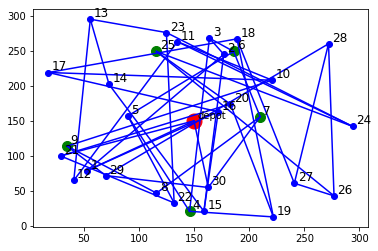

In [2]:
%matplotlib inline
import random
import numpy as np
import matplotlib.pyplot as plt

def pointGeneration(nb):
    n = nb
    scale = 10*n
    maxJoint = 1

    depot = (scale/2,scale/2)
    pointList = [depot]
    
    for i in range(n):
        pointList += (i,)
        pointList[i+1] = (random.randrange(0,scale),random.randrange(0,scale))
        
    return pointList
#------------------------------------------------------------------------------------
def plotPoints(pointList):
    plt.plot(pointList[0][0],pointList[0][1],"ro", markersize=15)
    plt.annotate("dépot", (pointList[0][0]+3, pointList[0][1]+3), fontsize=10)
    for i in range(len(pointList)):
        if (i!= 0):
            plt.plot(pointList[i][0], pointList[i][1],"bo")
            plt.annotate(i, (pointList[i][0]+3, pointList[i][1]+3), fontsize=12)
#------------------------------------------------------------------------------------
#fonction pour choisir un nombre de points comme point de livraisons
def randomPackages(nb, nbPointsMax):
    package = random.sample(range(1, nbPointsMax), nb)
    for i in range(len(package)):
        plt.plot(pointList[package[i]][0], pointList[package[i]][1],"go", markersize=10)
    return package

def traceSolution(s,package, pointList):
    plt.plot(pointList[0][0],pointList[0][1],"ro", markersize=15)
    plt.annotate("dépot", (pointList[0][0]+3, pointList[0][1]+3), fontsize=10)

    for i in range(len(package)):

        plt.plot(pointList[package[i]][0], pointList[package[i]][1],"go", markersize=10)

    for i in range(0,len(s)-1):
        x = (pointList[s[i]][0], pointList[s[i+1]][0])
        y = (pointList[s[i]][1], pointList[s[i+1]][1])
        plt.plot(x, y,"b", linestyle="solid")
        plt.annotate(s[i+1], (pointList[s[i+1]][0]+3, pointList[s[i+1]][1]+3), fontsize=12)

        
#------------------------------------------------------------------------------------
def makematrix(liste, linksLimit):
    matrix = np.zeros((len(liste),len(liste)))
    
    for i in range(len(matrix)):
        matrix[i][(i+1)%(len(matrix))] = 1
        matrix[(i+1)%(len(matrix))][i] = 1
    
    for i in range(len(matrix)):
        
        if i < len(matrix):
        
            nbchoisi = 0
            while(sum(matrix[i])<linksLimit and matrix[:, i].sum() < linksLimit):
                nbchoisi = np.random.randint(i,len(matrix))
                
                if (matrix[:, nbchoisi].sum() < linksLimit and sum(matrix[nbchoisi])<linksLimit):
                    matrix[i][nbchoisi] = 1
                    matrix[nbchoisi][i] = 1

            
                    
    for i in range(len(matrix)):
        matrix[i][i] = 0
    return matrix

            
def TraceLinks(matrix):
    # Pour chaque points, on trace une ligne avec chaque voisins
    for i in range(len(matrix)):
        for j in range(len(matrix)):
            if(i>j):
                if matrix[i][j] > 0:
                    x = (pointList[i][0], pointList[j][0])
                    y = (pointList[i][1], pointList[j][1])
                    plt.plot(x, y,"b", linestyle="solid")

                    
#------------------------------------------------------------------------------------
def ponderation(pointList, matrix):
    for i in range(len(matrix)):
        for j in range(len(matrix)):
            if matrix[i][j] == 1:
                poids = np.sqrt((pointList[i][0]-pointList[j][0])**2+(pointList[i][1]-pointList[j][1])**2)
                matrix[i][j] = round(poids)
                
                
#------------------------------------------------------------------------------------------------------------------------------------
nbPoints = 30
nbvoisins = 3
nbPackages = 5

pointList = pointGeneration(nbPoints)
print("Liste des points :", pointList)
plotPoints(pointList)
package = randomPackages(nbPackages, nbPoints)
matrix = makematrix(pointList, nbvoisins)
print("Matrice d'adjacence \n", matrix)
ponderation (pointList,matrix)
print("Matrice d'adjacence pondérée \n", matrix)
TraceLinks(matrix)


## generation de solution aléatoire

In [5]:
def generateSolution(matrix,package):

    packageLeft = package.copy()
    solution = [0]

    while(packageLeft):
        randomNext = np.random.randint(0,len(matrix))
        while( matrix[solution[-1]][randomNext] == 0 ):
            randomNext = np.random.randint(0,len(matrix))
        solution.append(randomNext)
        if(randomNext in packageLeft):
            packageLeft.remove(randomNext)
    
    while(solution[-1] != 0):
        randomNext = np.random.randint(0,len(matrix))
        while( matrix[solution[-1]][randomNext] == 0 ):
            randomNext = np.random.randint(0,len(matrix))
        solution.append(randomNext)
    
    return solution


def solutionLength(solution):

    totalLength = 0
    for i in range(0,len(solution)-1):
        totalLength += matrix[solution[i]][solution[i+1]]

    return totalLength

UniqueRandomSolution = generateSolution(matrix, package)
print(UniqueRandomSolution)

[0, 21, 0, 1, 2, 1, 0, 1, 2, 1, 2, 3, 2, 1, 16, 1, 2, 1, 16, 15, 14, 13, 23, 22, 5, 22, 21, 22, 23, 24, 23, 24, 25, 20, 25, 26, 25, 26, 25, 26, 27, 18, 19, 20, 25, 20, 21, 0, 1, 16, 15, 16, 15, 14, 15, 14, 13, 23, 24, 25, 24, 11, 24, 23, 22, 21, 22, 21, 0, 30, 7, 8, 7, 8, 9, 8, 9, 29, 9, 10, 17, 10, 9, 10, 9, 10, 9, 10, 17, 18, 27, 18, 17, 10, 9, 8, 9, 10, 17, 16, 17, 18, 27, 28, 27, 28, 26, 25, 20, 19, 20, 19, 18, 19, 20, 19, 20, 21, 22, 23, 13, 23, 24, 11, 24, 23, 24, 25, 26, 28, 26, 28, 27, 26, 28, 26, 27, 26, 25, 26, 27, 26, 25, 26, 27, 28, 27, 18, 17, 18, 17, 18, 17, 18, 27, 28, 27, 26, 25, 20, 21, 20, 19, 18, 27, 18, 19, 20, 25, 26, 28, 26, 25, 26, 25, 20, 21, 20, 21, 22, 23, 24, 23, 13, 12, 11, 24, 11, 10, 11, 12, 11, 24, 23, 13, 12, 13, 23, 24, 25, 20, 19, 20, 21, 20, 19, 4, 3, 6, 7, 6, 7, 8, 7, 6, 5, 6, 5, 4, 5, 4, 19, 20, 21, 20, 25, 26, 27, 26, 27, 18, 27, 18, 17, 16, 17, 16, 1, 16, 1, 0]


## Recuit Simulé

L'algorithme de recuit simulé, inspiré sur la métallurgie se base sur un refroidissement de température : On va prendre une température initiale et la faire descendre vers une température finale, une fois la température passée en dessous de la température finale, on arrète l'algorithme.

Il y a plusieurs types de refroidissements, ici on utilisera le refroidissement linéaire ou on retirera a chaque itération une constante a notre température, ou un refroidissement géométrique ou on multipliera une constante entre 0 et 1.

Au début de l'algo on donne une solution, qui devient la solution actuelle.
A chaque variation de température, on va comparer la solution actuelle avec une nouvelle solution générer, on va faire la différence des couts de ces solutions qu'on notera ∆E
Si la nouvelle solution est meilleure que la solution actuelle, (donc si ∆E est négatif), alors la nouvelle solution devient négative, par contre si la solution actuelle reste mieux, on va appliquer la formule suivante:
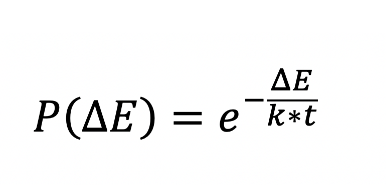
C'est une formule de probabilité, on a en puissance d'une exponentielle notre ∆E sur un k*t (pour nous k = 1), t représente la température.
Plus on va avoir une grande différence (donc plus l'écart sera grand entre la solution actuelle et la nouvelle) plus la probabilité sera proche de zéro. On génèrera un nombre aléatoire entre 0 et 1 pour tester en fonction de notre probabilité et si le nombre généré est plus petit que la proba, alors on remplacera la solution actuelle par la nouvelle meme si elle est moins performante.
Cela nous sert sous une certaine probabilité a n'accepter potentiellement que les petite variations afin de sortir de notre optimum local.
On effectue ces comparaisons un certain nombre de fois par variations de température, ici on a mis 100 fois dans le code ci-dessous.


Nous avons ajouté une étape d'optimisation de la solution finale, sur certains passages, on a des allers retours inutiles: par exemple, sur une solution [A,B,C,E,F,C,D,A] lorsqu'on doit livrer aux points B et D, On voit qu'entre les deux occurences du point C dans le chemin, les points E et F ne sont pas des points a livrer alors on a un passage inutile, on peux donc supprimer les points E,F et le 2eme point C, on se retrouve alors avec le chemin optimisé [A,B,C,D,A].

On a pour finir affiché la variation du cout en fonction de la variation de température, ainsi que le chemin final parcourus.

[6, 9, 7, 4, 25]
variation de temperature
variation de temperature
variation de temperature
variation de temperature
variation de temperature
variation de temperature
variation de temperature
variation de temperature
variation de temperature
variation de temperature
variation de temperature
variation de temperature
variation de temperature
variation de temperature
variation de temperature
variation de temperature
variation de temperature
variation de temperature
variation de temperature
variation de temperature
best solution : [0, 30, 7, 8, 9, 10, 17, 10, 17, 10, 9, 8, 7, 6, 5, 4, 3, 2, 1, 16, 17, 10, 11, 12, 13, 12, 13, 14, 13, 23, 22, 5, 4, 5, 6, 3, 6, 5, 6, 7, 30, 0, 21, 20, 19, 20, 25, 24, 25, 20, 21, 0]
best solution poids : 7558.0
optimisation de la meilleure solution trouvee
[0, 30, 7, 8, 9, 10, 9, 8, 7, 6, 5, 4, 3, 2, 1, 16, 17, 10, 11, 12, 13, 23, 22, 5, 4, 5, 6, 3, 6, 5, 6, 7, 30, 0, 21, 20, 25, 24, 25, 20, 21, 0]
distance totale : 5764.0


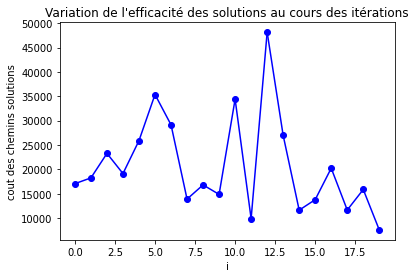

CPU times: user 5.11 s, sys: 68.8 ms, total: 5.18 s
Wall time: 4.88 s


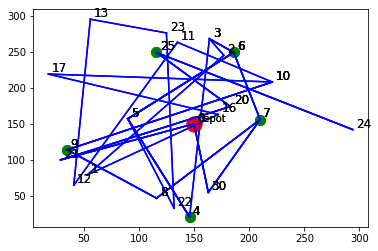

In [17]:
%%time
import random
import math

def verifPresenceElemtable1_In_table2(elemsAVerifier, TableauEntier):
    for e in elemsAVerifier:
        if(e in TableauEntier):
            return True
    return False  
    
def verif_Not_Useless_Path(solution, package):
    for i in solution:
        if solution.count(i) > 1:
            occurs = [j for j, x in enumerate(solution) if x == i]
            for o in range(len(occurs)):
                if (o != len(occurs)-1):
                    if (not(verifPresenceElemtable1_In_table2(package,solution[occurs[o]+1:occurs[o+1]+1]))):
                        del solution[occurs[o]+1:occurs[o+1]+1]
                        return False
                    
    return True            

def remove_useless_subpaths(solution, package):
    verif = False
    while(verif == False):#REMPLACER PAR WHILE
        verif = verif_Not_Useless_Path(solution, package)
    return solution

#--------------------------------------------------------------------------------------------------------------------------------------------

def plotAS(liste, listePoint, ):
    value = []
    index = []
    for i in range(len(liste)):
        value.append(liste[i][1])
        index.append(i)
    plt.plot(index, value, 'bo')
    plt.title("Variation de l'efficacité des solutions au cours des itérations")
    plt.xlabel('i')
    plt.ylabel('cout des chemins solutions')
    for i in range(len(index)-1):
        x = (i, i+1)
        y = (value[i], value[i+1])
        plt.plot(x, y,"b", linestyle="solid")
    plt.show()
        
    
    
#Functions of temp decreasing    
def TempReductionLinear(currTemp,alpha):
    currTemp -= alpha

def TempReductionGeometric(currTemp, alpha):
    currTemp *= alpha

def SimulatedAnnealing(matrix, package, listepoint, init_solution, init_temp, final_temp, iterationPerTemp = 100, alpha=10, beta=5):
    print(package)
    list_solution_cost = []
    currTemp = init_temp
    solution = init_solution
    while (currTemp > final_temp):
        print("variation de temperature")
        for i in range(iterationPerTemp):
            newSolution = generateSolution(matrix, package)
            # get the cost between the two solutions
            cost = solutionLength(solution) - solutionLength(newSolution)
            # if the new solution is better, accept it
            if cost >= 0:
                solution = newSolution
            # if the new solution is not better, accept it with a probability of e^(-cost/temp)
            else:
                if ((-cost / currTemp) < 708 ):
                    if random.uniform(0, 1) < math.exp(-cost / currTemp):
                        solution = newSolution
        # decrement the temperature
        list_solution_cost.append([solution, solutionLength(solution)])
        currTemp -= alpha
        #print(solution)
        #print(solutionLength(solution))
        #print("\n")
    cost_mini = None
    best_solution = None
    for i in range(len(list_solution_cost)):
        if (i == 0):
            cost_mini = list_solution_cost[i][1]
            best_solution = list_solution_cost[i][0]
        elif(list_solution_cost[i][1] < cost_mini):
            cost_mini = list_solution_cost[i][1]
            best_solution = list_solution_cost[i][0]
    print("best solution : " + str(best_solution))
    print("best solution poids : " + str(cost_mini))
    print("optimisation de la meilleure solution trouvee")
    print(remove_useless_subpaths(best_solution, package))
    print("distance totale : "+ str(solutionLength(best_solution)))
    plotAS(list_solution_cost,listepoint)
    traceSolution(best_solution,package, pointList)
    return best_solution
    
    
    
traceSolution(SimulatedAnnealing(matrix, package, pointList, UniqueRandomSolution, 100, 1, iterationPerTemp = 50, alpha=5),package, pointList)





# Solution finale dans instance sous contrainte de variation du trafic:

On utilise le même algorithme, seulement le poids sera temporel maintenant.
On définit une journée allant de 8h a 18h, a chacune de ces heures, on définit un pourcentage en fonction du trafic. par exemple a 8h on ne roule qu'a 60% de la vitesse max.
On définit donc aussi une vitesse max pour nos routes, ici on a mis 130 Km/h.
Pour chaque points de la solution, on va calculer le temps de route en fonction de notre vitesse (réduite ou non par le trafic) et de notre distance.
Si on dépasse de la plage temporelle, alors on recommence une journée (et donc on ajoute 1 a notre compteur de jour) en retournant a 8h (heure de départ de la journée de travail).

[6, 9, 7, 4, 25]
variation de temperature
variation de temperature
variation de temperature
variation de temperature
variation de temperature
variation de temperature
variation de temperature
variation de temperature
variation de temperature
variation de temperature
variation de temperature
variation de temperature
variation de temperature
variation de temperature
variation de temperature
variation de temperature
variation de temperature
variation de temperature
variation de temperature
variation de temperature
best solution : [0, 30, 29, 28, 26, 25, 26, 28, 29, 9, 8, 9, 29, 28, 26, 27, 26, 27, 28, 29, 30, 0, 1, 0, 30, 7, 6, 7, 30, 0, 1, 16, 1, 2, 3, 2, 1, 2, 3, 4, 3, 4, 19, 20, 21, 0]
best solution poids : 6545.0
optimisation de la meilleure solution trouvee
[0, 30, 29, 28, 26, 25, 26, 28, 29, 9, 8, 9, 29, 30, 7, 6, 7, 30, 0, 1, 2, 3, 4, 3, 4, 19, 20, 21, 0]
4265.0


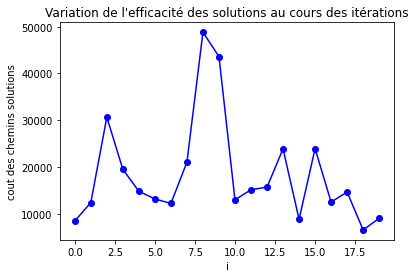

Nombre de jours: 2
Nombre d'heure en plus des jours: 6


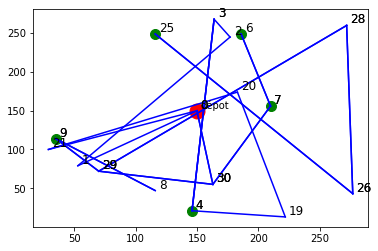

In [16]:
def variationTraficTemps(solution, matrix):
    speed = 130
    startTime = 8
    currentTime = startTime
    totalDays = 0
    
    dict_speed_reduction_by_time = {8:0.6, 9:0.6, 10:0.7, 11:0.9, 12:0.7, 13:0.7, 14:0.9, 15:1, 16:0.7, 17:0.6, 18:0.7}
    #------------------------------------------------------------------------------------------------------------------------------------------------
    for p in range(0,len(solution)-1):
        #print("currenttime "+str(currentTime))
        #print("speed : "+ str(speed* dict_speed_reduction_by_time[currentTime]))
        #print("distance: "+str(matrix[solution[p]][solution[p+1]]))
        time2points = int(matrix[solution[p]][solution[p+1]] /(speed* dict_speed_reduction_by_time[currentTime]))
        #print("time2points : "+ str(time2points))
        #print("\n")
        if ((18 - currentTime) < time2points):
            totalDays +=1
            currentTime = 8
        else:
            currentTime += time2points
        
    return([totalDays, currentTime-8])

result = variationTraficTemps(SimulatedAnnealing(matrix, package, pointList, UniqueRandomSolution, 100, 1, iterationPerTemp = 50, alpha=5),matrix)
print("Nombre de jours: "+ str(result[0]))
print("Nombre d'heures en plus des jours: "+ str(result[1]))






## prise en compte des variations a chaques iterations

On compare maintenant a chaque itération avec la formule de probabilité, en faisant ca, on inclue vraiment la contrainte dans l'optimisation de la solution, car tous les couts seront comparés en temps et non plus en distances.

In [21]:
%%time
import random
import math

def variationTraficTemps(solution, matrix):
    speed = 130
    startTime = 8
    currentTime = startTime
    totalDays = 0
    
    dict_speed_reduction_by_time = {8:0.6, 9:0.6, 10:0.7, 11:0.9, 12:0.7, 13:0.7, 14:0.9, 15:1, 16:0.7, 17:0.6, 18:0.7}
    #------------------------------------------------------------------------------------------------------------------------------------------------
    for p in range(0,len(solution)-1):
        #print("currenttime "+str(currentTime))
        #print("speed : "+ str(speed* dict_speed_reduction_by_time[currentTime]))
        #print("distance: "+str(matrix[solution[p]][solution[p+1]]))
        time2points = int(matrix[solution[p]][solution[p+1]] /(speed* dict_speed_reduction_by_time[currentTime]))
        #print("time2points : "+ str(time2points))
        #print("\n")
        if ((18 - currentTime) < time2points):
            totalDays +=1
            currentTime = 8
        else:
            currentTime += time2points
        
    return([totalDays, currentTime-8])


def verifPresenceElemtable1_In_table2(elemsAVerifier, TableauEntier):
    for e in elemsAVerifier:
        if(e in TableauEntier):
            return True
    return False  
    
def verif_Not_Useless_Path(solution, package):
    for i in solution:
        if solution.count(i) > 1:
            occurs = [j for j, x in enumerate(solution) if x == i]
            for o in range(len(occurs)):
                if (o != len(occurs)-1):
                    if (not(verifPresenceElemtable1_In_table2(package,solution[occurs[o]+1:occurs[o+1]+1]))):
                        del solution[occurs[o]+1:occurs[o+1]+1]
                        return False
                    
    return True
#--------------------------------------------------------------------------------------------------------------------------------------------
            

def remove_useless_subpaths(solution, package):
    verif = False
    while(verif == False):#REMPLACER PAR WHILE
        verif = verif_Not_Useless_Path(solution, package)
    return solution
        
def plotASWithCounstraint(liste, listePoint):
    print("test")
    
    
#Functions of temp decreasing    
def TempReductionLinear(currTemp,alpha):
    currTemp -= alpha

def TempReductionGeometric(currTemp, alpha):
    currTemp *= alpha

def TempReductionsLowDecrease(currTemp, alpha):
    currTemp = currTemp / (1 + beta * currTemp)

def SimulatedAnnealing_variations(matrix, package, init_solution, init_temp, final_temp, iterationPerTemp = 100, alpha=10, beta=5):
    print(package)
    list_solution_cost = []
    currTemp = init_temp
    solution = init_solution
    while (currTemp > final_temp):
        print("variation de temperature")
        for i in range(iterationPerTemp):
            newSolution = generateSolution(matrix, package)
            # get the cost between the two solutions
            costSolution = variationTraficTemps(solution,matrix)
            costNewSolution = variationTraficTemps(newSolution,matrix)
            cost = (costSolution[0]*11+costSolution[1]) - (costNewSolution[0]*11+costNewSolution[1])
            # if the new solution is better, accept it
            if cost >= 0:
                solution = newSolution
            # if the new solution is not better, accept it with a probability of e^(-cost/temp)
            else:
                if ((-cost / currTemp) < 708 ):
                    if random.uniform(0, 1) < math.exp(-cost / currTemp):
                        solution = newSolution
        # decrement the temperature
        list_solution_cost.append([solution, solutionLength(solution)])
        currTemp -= alpha
        #print(solution)
        #print("Distance totale: " + str(solutionLength(solution)))
        #print("temps total en heure (journees de 11h) : "+ str(variationTraficTemps(solution,matrix)))
        #print("\n")
    cost_mini = None
    best_solution = None
    for i in range(len(list_solution_cost)):
        if (i == 0):
            cost_mini = list_solution_cost[i][1]
            best_solution = list_solution_cost[i][0]
        elif(list_solution_cost[i][1] < cost_mini):
            cost_mini = list_solution_cost[i][1]
            best_solution = list_solution_cost[i][0]
    #print("best solution : " + str(best_solution))
    #print("best solution poids : " + str(cost_mini))
    #print("optimisation de la meilleure solution trouvee")
    #print(remove_useless_subpaths(best_solution, package))
    #print(solutionLength(best_solution))
    #print("temps en h apres simplification : " + str(variationTraficTemps(best_solution,matrix)))
    return variationTraficTemps(best_solution,matrix)

result = SimulatedAnnealing_variations(matrix, package, UniqueRandomSolution, 100, 1, iterationPerTemp = 50, alpha=10)
print("Nombre de jours: "+ str(result[0]))
print("Nombre d'heures en plus des jours: "+ str(result[1]))

[6, 9, 7, 4, 25]
variation de temperature
variation de temperature
variation de temperature
variation de temperature
variation de temperature
variation de temperature
variation de temperature
variation de temperature
variation de temperature
variation de temperature
Nombre de jours: 2
Nombre d'heures en plus des jours: 8
CPU times: user 2.18 s, sys: 0 ns, total: 2.18 s
Wall time: 2.17 s


# Optimisations encore possibles
Solution de départ:
Au lieu de générer une solution complètement aléatoire en début d'algorithme, on pourrait injecter directement un optimum local pour avoir, on pourrait utiliser un algo d'arbre couvrant minimal par exemple.

Comparaison avec des voisins:
Au lieu de générer des solutions a chaque fois, il faudrait comparer avec des solutions voisines, le problème de cette solution est que la taille de notre parcours est très variable donc il faut arriver a trouver une solution voisine qui fasse varier la taille du parcours tout en respectant notre contrainte de routes existantes.

# Bibliographie

Choice of best possible metaheuristic algorithm for the travelling salesman problem with limited computational time: quality, uncertainty and speed - Marek Antosiewicz, Grzegorz Koloch, Bogumił Kamiński : https://www.researchgate.net/profile/Bogumil-Kaminski-2/publication/312889331_Choice_of_best_possible_metaheuristic_algorithm_for_the_travelling_salesman_problem_with_limited_computational_time_Quality_uncertainty_and_speed/links/5fc22195a6fdcc6cc677a46a/Choice-of-best-possible-metaheuristic-algorithm-for-the-travelling-salesman-problem-with-limited-computational-time-Quality-uncertainty-and-speed.pdf

Optimization by Simulated Annealing - S. Kirkpatrick; C. D. Gelatt; M. P. Vecchi : https://sci2s.ugr.es/sites/default/files/files/Teaching/GraduatesCourses/Metaheuristicas/Bibliography/1983-Science-Kirkpatrick-sim_anneal.pdf

Thermodynamical Approach to the Traveling Salesman Problem: An Efficient Simulation Algorithm - V. CERNY : http://mkweb.bcgsc.ca/papers/cerny-travelingsalesman.pdf


